In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
import sklearn
from sklearn import preprocessing
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.utils import resample
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [2]:
df = pd.read_csv('top50.csv' ,encoding = 'unicode_escape', engine ='python')
df = df.iloc[: , 1:]
df

,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94
5,I Don't Care (with Justin Bieber),Ed Sheeran,pop,102,68,80,-5,9,84,220,9,4,84
6,Ransom,Lil Tecca,trap music,180,64,75,-6,7,23,131,2,29,92
7,How Do You Sleep?,Sam Smith,pop,111,68,48,-5,8,35,202,15,9,90
8,Old Town Road - Remix,Lil Nas X,country rap,136,62,88,-6,11,64,157,5,10,87
9,bad guy,Billie Eilish,electropop,135,43,70,-11,10,56,194,33,38,95


In [3]:
df.shape

(50, 13)

In [4]:
df.dtypes

Track.Name          object
Artist.Name         object
Genre               object
Beats.Per.Minute     int64
Energy               int64
Danceability         int64
Loudness..dB..       int64
Liveness             int64
Valence.             int64
Length.              int64
Acousticness..       int64
Speechiness.         int64
Popularity           int64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Track.Name        50 non-null     object
 1   Artist.Name       50 non-null     object
 2   Genre             50 non-null     object
 3   Beats.Per.Minute  50 non-null     int64 
 4   Energy            50 non-null     int64 
 5   Danceability      50 non-null     int64 
 6   Loudness..dB..    50 non-null     int64 
 7   Liveness          50 non-null     int64 
 8   Valence.          50 non-null     int64 
 9   Length.           50 non-null     int64 
 10  Acousticness..    50 non-null     int64 
 11  Speechiness.      50 non-null     int64 
 12  Popularity        50 non-null     int64 
dtypes: int64(10), object(3)
memory usage: 5.2+ KB


In [6]:
df.describe()

,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
count,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,120.060000,64.060000,71.38000,-5.660000,14.660000,54.600000,200.960000,22.160000,12.480000,87.500000
std,30.898392,14.231913,11.92988,2.056448,11.118306,22.336024,39.143879,18.995553,11.161596,4.491489
min,85.000000,32.000000,29.00000,-11.000000,5.000000,10.000000,115.000000,1.000000,3.000000,70.000000
25%,96.000000,55.250000,67.00000,-6.750000,8.000000,38.250000,176.750000,8.250000,5.000000,86.000000
50%,104.500000,66.500000,73.50000,-6.000000,11.000000,55.500000,198.000000,15.000000,7.000000,88.000000
75%,137.500000,74.750000,79.75000,-4.000000,15.750000,69.500000,217.500000,33.750000,15.000000,90.750000
max,190.000000,88.000000,90.00000,-2.000000,58.000000,95.000000,309.000000,75.000000,46.000000,95.000000


In [7]:
df['Artist.Name'].value_counts()

Ed Sheeran          4
Shawn Mendes        2
Lil Nas X           2
J Balvin            2
Sech                2
Billie Eilish       2
The Chainsmokers    2
Marshmello          2
Post Malone         2
Ariana Grande       2
ROSALÍA             1
Khalid              1
Lady Gaga           1
Daddy Yankee        1
Kygo                1
Lauv                1
Jonas Brothers      1
Martin Garrix       1
Katy Perry          1
Young Thug          1
Maluma              1
Taylor Swift        1
Jhay Cortez         1
Ali Gatie           1
Tones and I         1
Lunay               1
Anuel AA            1
MEDUZA              1
Lizzo               1
Y2K                 1
Chris Brown         1
Drake               1
Lewis Capaldi       1
DJ Snake            1
Bad Bunny           1
Sam Smith           1
Lil Tecca           1
Nicky Jam           1
Name: Artist.Name, dtype: int64

In [8]:
df['Genre'].value_counts()

dance pop           8
pop                 7
latin               5
canadian hip hop    3
edm                 3
reggaeton           2
reggaeton flow      2
panamanian pop      2
canadian pop        2
electropop          2
country rap         2
dfw rap             2
brostep             2
trap music          1
escape room         1
pop house           1
australian pop      1
atl hip hop         1
big room            1
boy band            1
r&b en espanol      1
Name: Genre, dtype: int64

In [9]:
df.sort_values(by='Popularity', ascending=False)

,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
9,bad guy,Billie Eilish,electropop,135,43,70,-11,10,56,194,33,38,95
4,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94
10,Callaita,Bad Bunny,reggaeton,176,62,61,-5,24,24,251,60,31,93
14,Money In The Grave (Drake ft. Rick Ross),Drake,canadian hip hop,101,50,83,-4,12,10,205,10,5,92
1,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
6,Ransom,Lil Tecca,trap music,180,64,75,-6,7,23,131,2,29,92
36,Otro Trago,Sech,panamanian pop,176,70,75,-5,11,62,226,14,34,91
21,Panini,Lil Nas X,country rap,154,59,70,-6,12,48,115,34,8,91
20,Piece Of Your Heart,MEDUZA,pop house,124,74,68,-7,7,63,153,4,3,91
19,Truth Hurts,Lizzo,escape room,158,62,72,-3,12,41,173,11,11,91


# Exploratory Data Analysis

#### Looking for duplicates

In [10]:
df[df['Track.Name'].duplicated()]

,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity


In [11]:
df[df['Artist.Name'].duplicated()]

,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
5,I Don't Care (with Justin Bieber),Ed Sheeran,pop,102,68,80,-5,9,84,220,9,4,84
17,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,dfw rap,90,48,76,-6,7,91,158,56,5,91
21,Panini,Lil Nas X,country rap,154,59,70,-6,12,48,115,34,8,91
24,bad guy (with Justin Bieber),Billie Eilish,electropop,135,45,67,-11,12,68,195,25,30,89
25,If I Can't Have You,Shawn Mendes,canadian pop,124,82,69,-4,13,87,191,49,6,70
29,QUE PRETENDES,J Balvin,latin,93,79,64,-4,36,94,222,3,25,89
31,7 rings,Ariana Grande,dance pop,140,32,78,-11,9,33,179,59,33,89
36,Otro Trago,Sech,panamanian pop,176,70,75,-5,11,62,226,14,34,91
37,Antisocial (with Travis Scott),Ed Sheeran,pop,152,82,72,-5,36,91,162,13,5,87
47,Happier,Marshmello,brostep,100,79,69,-3,17,67,214,19,5,88


There are a few duplicate artist names. We definitely have to retain this column and use it as a categorical feature.

#### Looking for Missing values

In [12]:
df.isna().sum()

Track.Name          0
Artist.Name         0
Genre               0
Beats.Per.Minute    0
Energy              0
Danceability        0
Loudness..dB..      0
Liveness            0
Valence.            0
Length.             0
Acousticness..      0
Speechiness.        0
Popularity          0
dtype: int64

In [13]:
df.dropna(inplace=True)

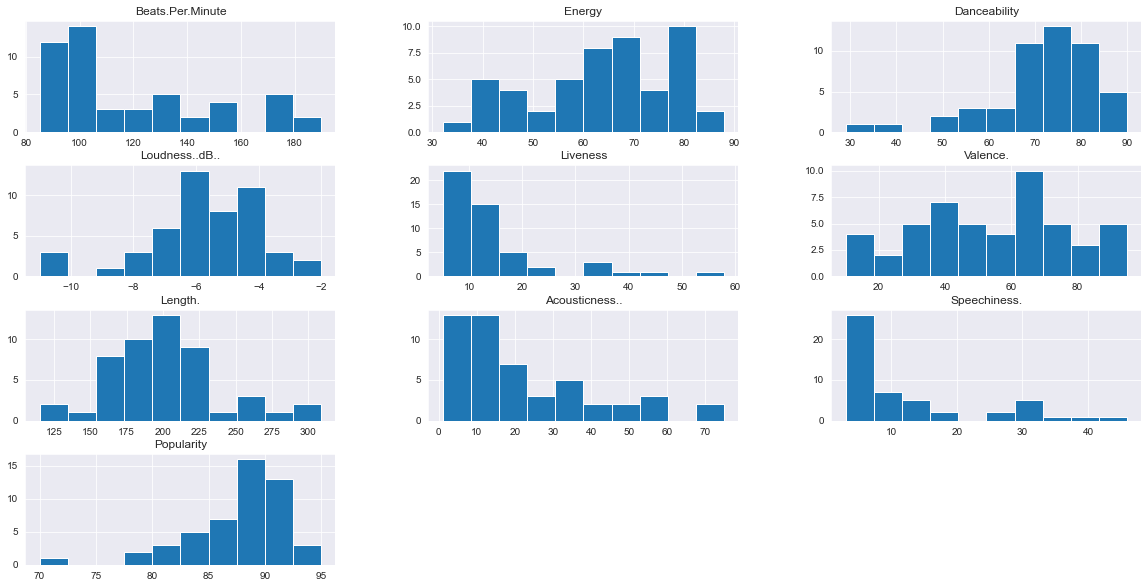

In [14]:
df.hist(figsize=(20,10))
plt.show()

/Users/mohammedhussain/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Popularity', ylabel='Density'>

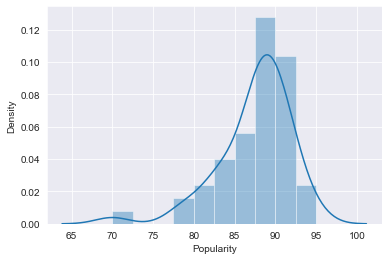

In [15]:
#Target variable distribution
sns.distplot(df['Popularity'])

/Users/mohammedhussain/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Popularity'>

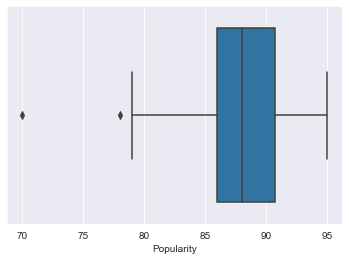

In [16]:
sns.boxplot(df['Popularity'])

/Users/mohammedhussain/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Popularity'>

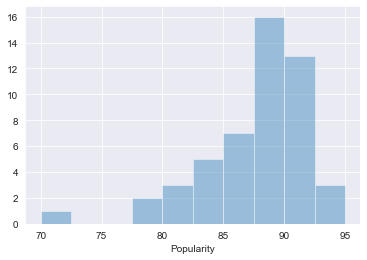

In [17]:
sns.distplot(df['Popularity'],bins=10,kde=False)

In [18]:
df['Popularity'].describe()

count    50.000000
mean     87.500000
std       4.491489
min      70.000000
25%      86.000000
50%      88.000000
75%      90.750000
max      95.000000
Name: Popularity, dtype: float64

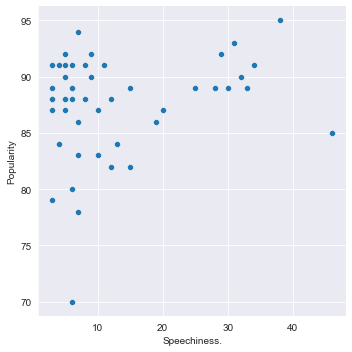

In [19]:
sns.relplot(x="Speechiness.", y="Popularity", data=df)

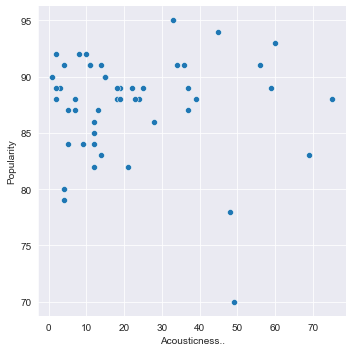

In [20]:
sns.relplot(x="Acousticness..", y="Popularity", data=df)

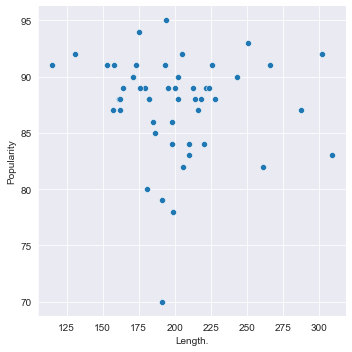

In [21]:
sns.relplot(x="Length.", y="Popularity", data=df)

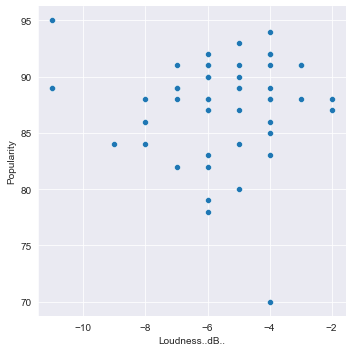

In [22]:
sns.relplot(x="Loudness..dB..", y="Popularity", data=df)

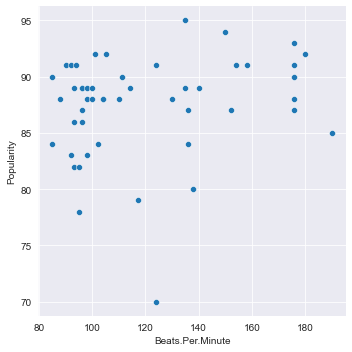

In [23]:
sns.relplot(x="Beats.Per.Minute", y="Popularity", data=df)

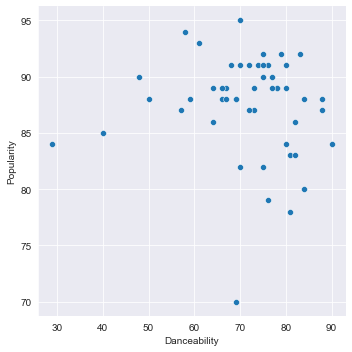

In [24]:
sns.relplot(x="Danceability", y="Popularity", data=df)

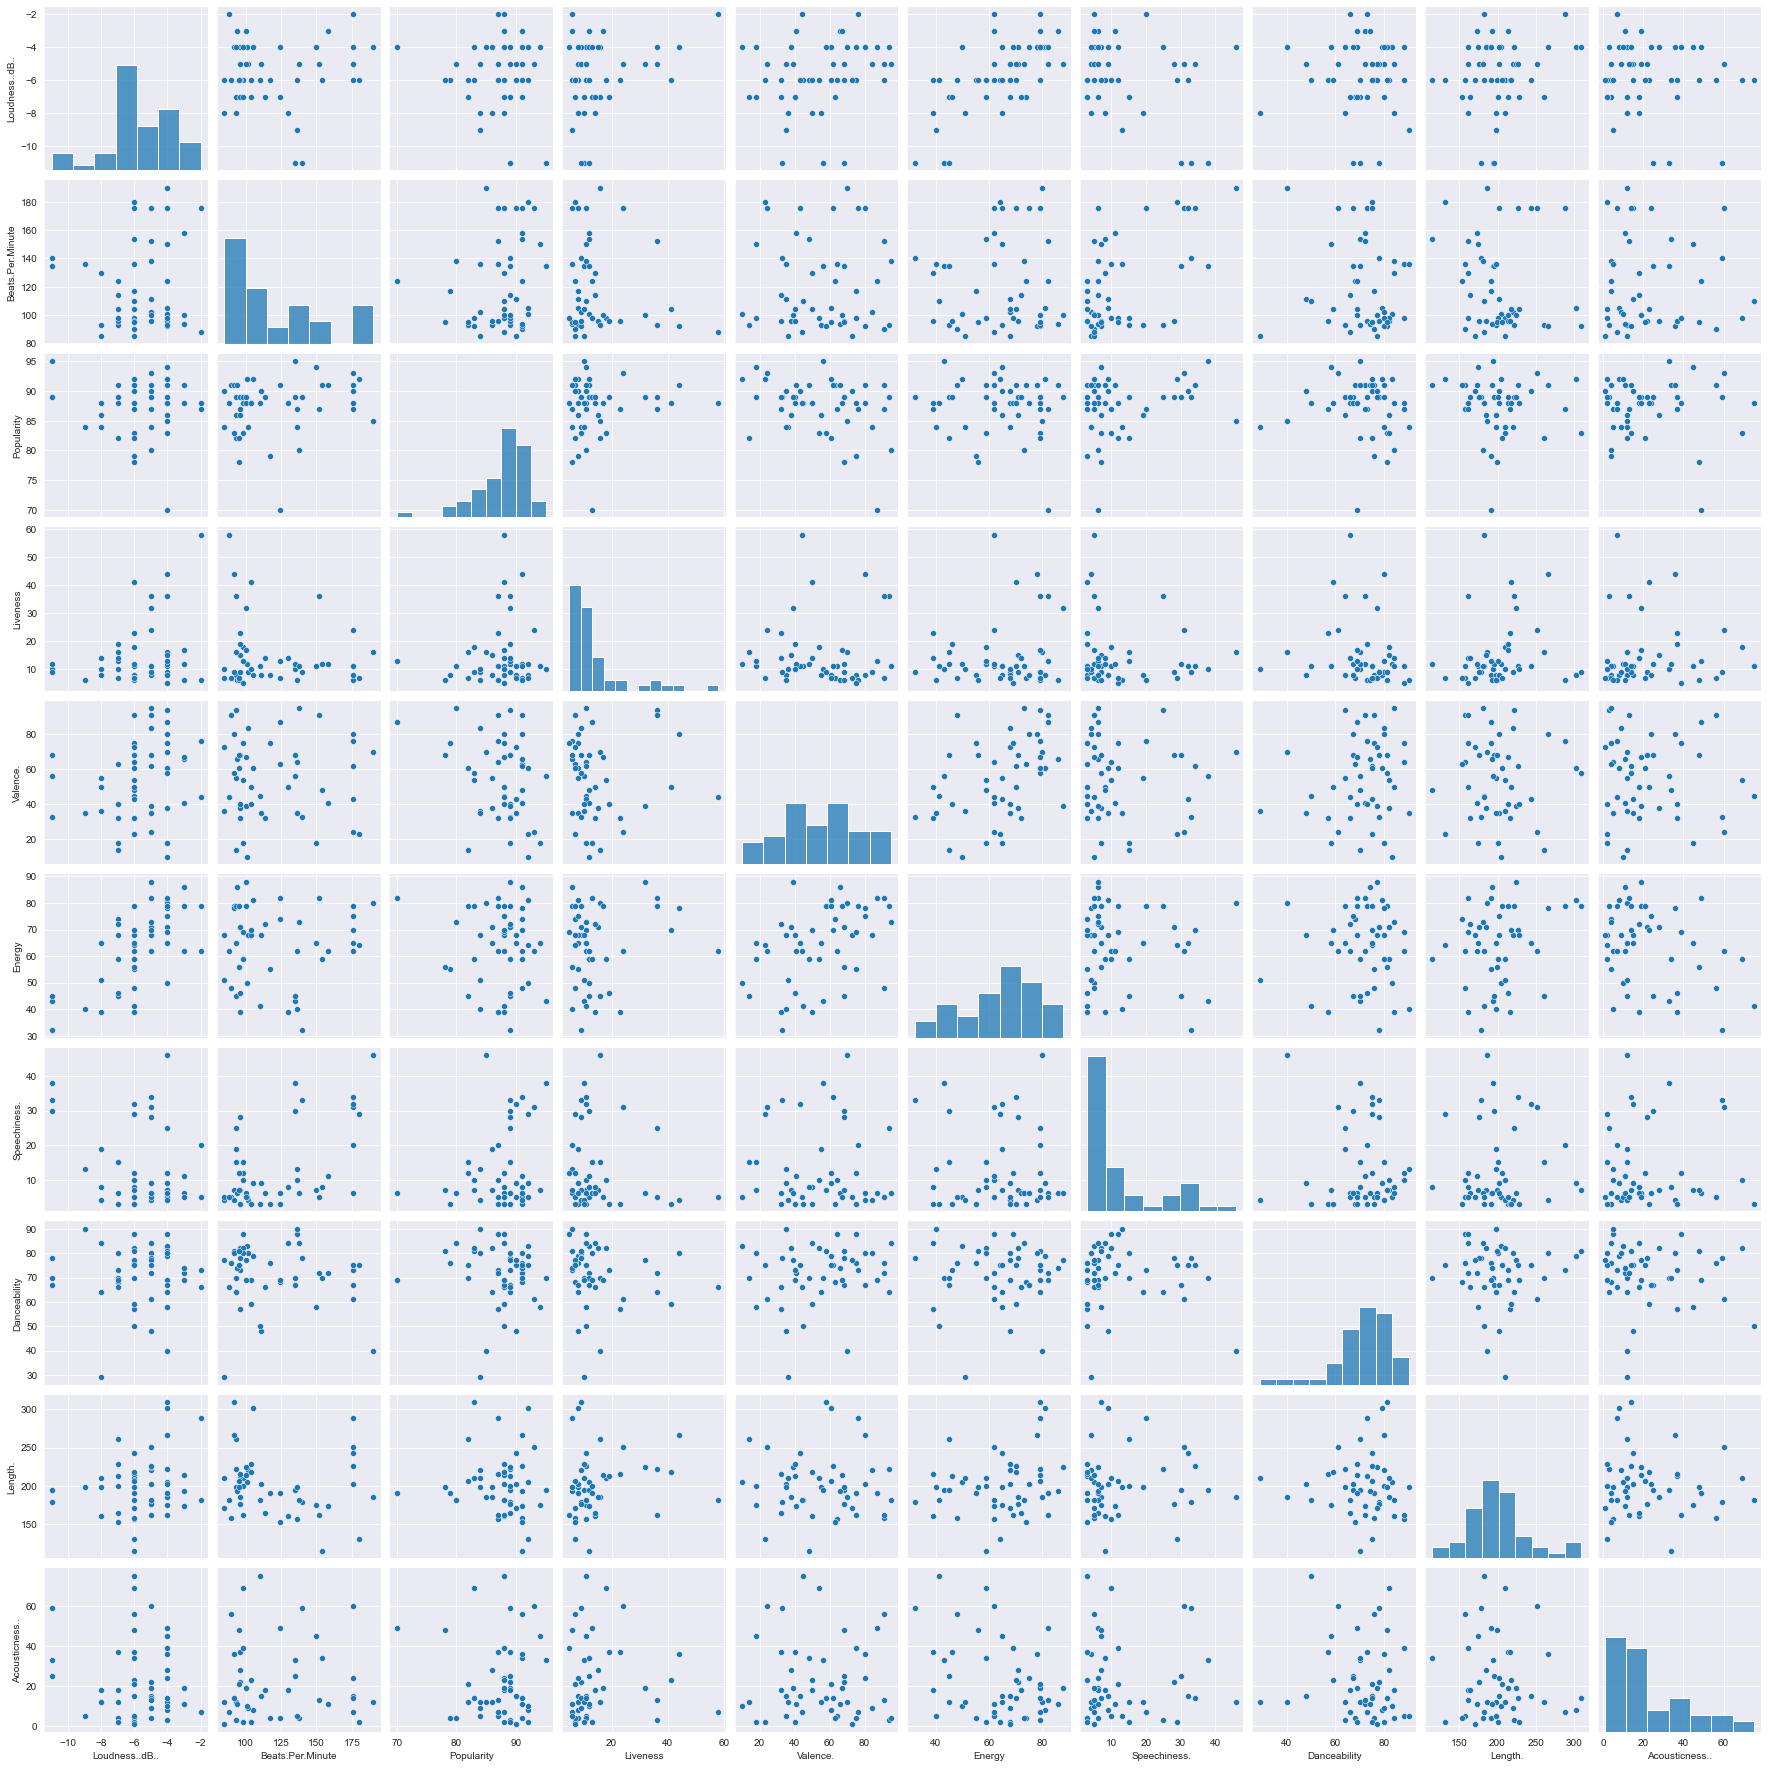

In [25]:
sns.pairplot(df, vars=['Loudness..dB..', 'Beats.Per.Minute','Popularity', 'Liveness','Valence.', 'Energy', 'Speechiness.', 'Danceability','Length.', 'Acousticness..'])

<AxesSubplot:xlabel='Energy', ylabel='Popularity'>

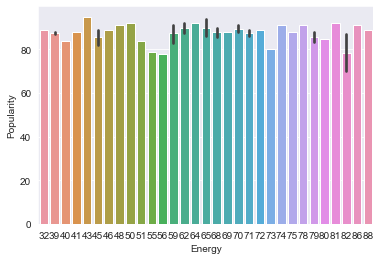

In [26]:
sns.barplot(x = 'Energy', y = 'Popularity', data = df)


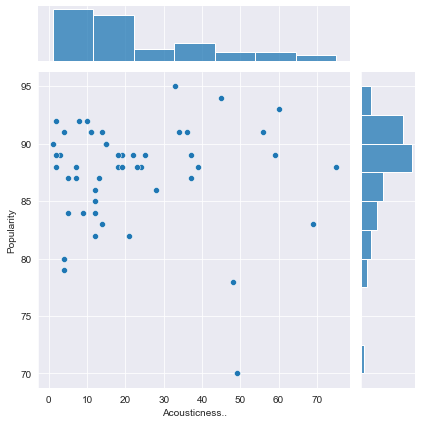

In [27]:
sns.jointplot(x = 'Acousticness..', y = 'Popularity', data = df)

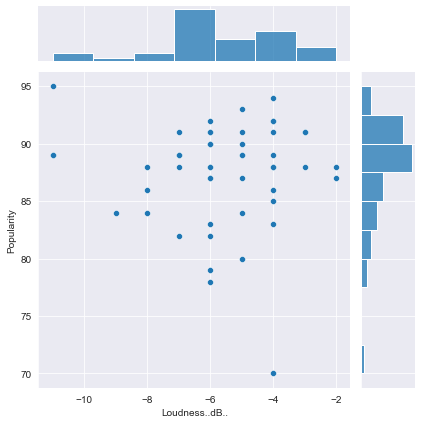

In [28]:
sns.jointplot(x = 'Loudness..dB..', y = 'Popularity', data = df)

<AxesSubplot:>

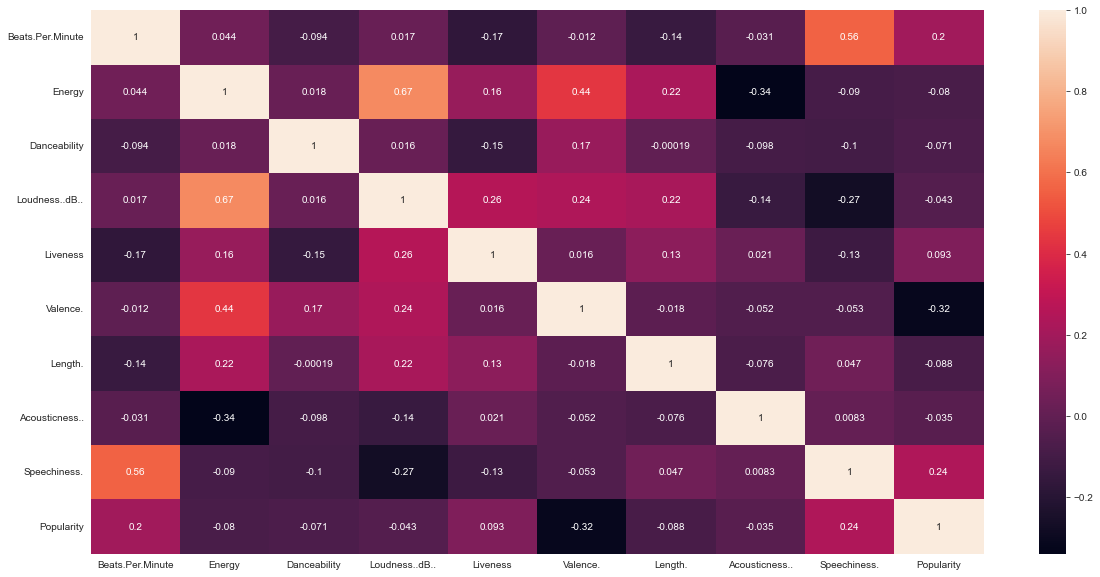

In [29]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(),annot = True)

In [30]:
# Calculate Pearson's R-Value to check for linear relationship
df.corr()['Popularity'].sort_values(ascending=False)

Popularity          1.000000
Speechiness.        0.238553
Beats.Per.Minute    0.196097
Liveness            0.092564
Acousticness..     -0.034684
Loudness..dB..     -0.043085
Danceability       -0.071413
Energy             -0.080295
Length.            -0.087639
Valence.           -0.317752
Name: Popularity, dtype: float64

Dimensionality Reduction using VIF

### Checking multicollinearity using VIF( variance inflation factor)

In [31]:
df_nums = df.drop(columns=['Track.Name','Artist.Name','Genre'])

vif = pd.DataFrame()

# For each column,run a variance_inflaction_factor against all other columns to get a VIF Factor score
vif["VIF Score"] = [variance_inflation_factor(df_nums.values, i) for i in range(df_nums.shape[1])]

# label the scores with their related columns
vif["features"] = df_nums.columns

vif.round(1)

,VIF Score,features
0,26.3,Beats.Per.Minute
1,50.7,Energy
2,38.9,Danceability
3,16.1,Loudness..dB..
4,3.3,Liveness
5,10.1,Valence.
6,29.3,Length.
7,2.7,Acousticness..
8,3.7,Speechiness.
9,149.7,Popularity


If VIF > 5 there is an indication that multicollinearity may be present; with VIF > 10 there is certainly multicollinearity among the variables.

Based on first run of VIF scores, danceability, energy, Length,Loudness..dB.. and Beats.Per.Minute clearly have multi-collinearity, thus we drop them to reduce noise.

# Cleaning the data before the regression

In [32]:
#Drop collinear columns
df_cleaned = df.drop(columns=['Artist.Name','Track.Name','Danceability',
                             'Energy', 
                             'Length.', 
                             'Beats.Per.Minute', 
                             'Loudness..dB..' 
                           ])
df_cleaned

,Genre,Liveness,Valence.,Acousticness..,Speechiness.,Popularity
0,canadian pop,8,75,4,3,79
1,reggaeton flow,8,61,8,9,92
2,dance pop,16,70,12,46,85
3,pop,8,55,12,19,86
4,dfw rap,11,18,45,7,94
5,pop,9,84,9,4,84
6,trap music,7,23,2,29,92
7,pop,8,35,15,9,90
8,country rap,11,64,5,10,87
9,electropop,10,56,33,38,95


<AxesSubplot:xlabel='Acousticness..', ylabel='Popularity'>

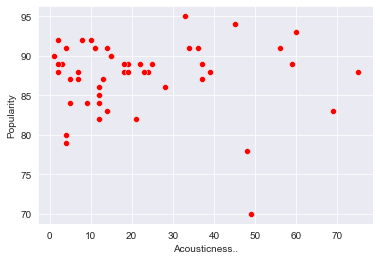

In [33]:
sns.scatterplot(x = 'Acousticness..', y = 'Popularity', data = df_cleaned, color = 'red')

<AxesSubplot:xlabel='Speechiness.', ylabel='Popularity'>

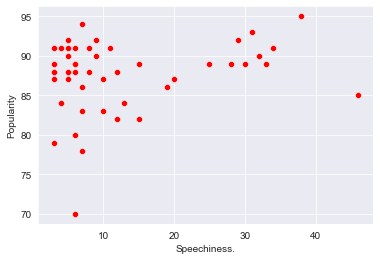

In [34]:
sns.scatterplot(x = 'Speechiness.', y = 'Popularity', data = df_cleaned, color = 'red')

<AxesSubplot:xlabel='Valence.', ylabel='Popularity'>

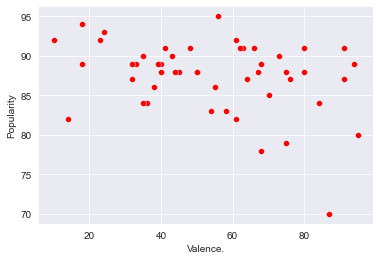

In [35]:
sns.scatterplot(x = 'Valence.', y = 'Popularity', data = df_cleaned, color = 'red')

<AxesSubplot:xlabel='Liveness', ylabel='Popularity'>

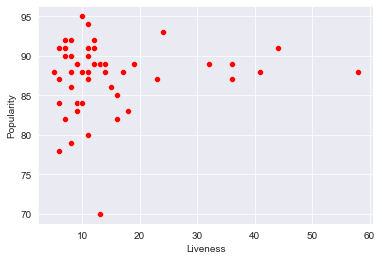

In [36]:
sns.scatterplot(x = 'Liveness', y = 'Popularity', data = df_cleaned, color = 'red')

In [37]:
df_cleaned.dtypes

Genre             object
Liveness           int64
Valence.           int64
Acousticness..     int64
Speechiness.       int64
Popularity         int64
dtype: object

# Removing the Outliers

In [38]:
#Outlier Removal with the IQR method

def find_outliers_IQR(data, return_limits = False):
    """Use Tukey's Method of outlier removal AKA InterQuartile-Range Rule
    and return boolean series where True indicates it is an outlier.
    - Calculates the range between the 75% and 25% quartiles
    - Outliers fall outside upper and lower limits, using a treshold of  1.5*IQR the 75% and 25% quartiles.

    IQR Range Calculation:    
        res = df.describe()
        IQR = res['75%'] -  res['25%']
        lower_limit = res['25%'] - 1.5*IQR
        upper_limit = res['75%'] + 1.5*IQR

    Args:
        data (Series,or ndarray): data to test for outliers.

    Returns:
        [boolean Series]: A True/False for each row use to slice outliers.
    
    Adapted from Flatiron School Phase #2 Py Files.
    URL = https://github.com/flatiron-school/Online-DS-FT-022221-Cohort-Notes/blob/master/py_files/functions_SG.py
    
    """
    df_b=data
    res= df_b.describe()

    IQR = res['75%'] -  res['25%']
    lower_limit = res['25%'] - 1.5*IQR
    upper_limit = res['75%'] + 1.5*IQR
    
    if return_limits:
        return lower_limit, upper_limit
    
    else:
        idx_outs = (df_b>upper_limit) | (df_b<lower_limit)
        return idx_outs

In [39]:
#removing outliers from the popularity column
df_cleaned = df_cleaned[find_outliers_IQR(df_cleaned['Popularity'])==False]
#displaying minimum & maxium values in popularity column 
print("Minimum:", df_cleaned['Popularity'].min())
print("Maximum:", df_cleaned['Popularity'].max())

Minimum: 79
Maximum: 95


### One hot encoding

In [40]:
data = pd.get_dummies(df_cleaned, columns=['Genre'], drop_first=True)
data

,Liveness,Valence.,Acousticness..,Speechiness.,Popularity,Genre_australian pop,Genre_big room,Genre_boy band,Genre_brostep,Genre_canadian hip hop,...,Genre_electropop,Genre_escape room,Genre_latin,Genre_panamanian pop,Genre_pop,Genre_pop house,Genre_r&b en espanol,Genre_reggaeton,Genre_reggaeton flow,Genre_trap music
0,8,75,4,3,79,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,61,8,9,92,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,16,70,12,46,85,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8,55,12,19,86,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,11,18,45,7,94,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,9,84,9,4,84,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6,7,23,2,29,92,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,8,35,15,9,90,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8,11,64,5,10,87,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,56,33,38,95,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


# Standard Scaling for Numerical variables

In [41]:
numerical_cols = ['Liveness','Valence.', 'Acousticness..','Speechiness.']

In [42]:
standard_scaler = StandardScaler().fit(data[numerical_cols])

data[numerical_cols] = standard_scaler.transform(data[numerical_cols])
data

,Liveness,Valence.,Acousticness..,Speechiness.,Popularity,Genre_australian pop,Genre_big room,Genre_boy band,Genre_brostep,Genre_canadian hip hop,...,Genre_electropop,Genre_escape room,Genre_latin,Genre_panamanian pop,Genre_pop,Genre_pop house,Genre_r&b en espanol,Genre_reggaeton,Genre_reggaeton flow,Genre_trap music
0,-0.616088,0.971879,-0.927769,-0.868073,79,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.616088,0.334706,-0.710270,-0.332730,92,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0.100814,0.744317,-0.492771,2.968550,85,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.616088,0.061631,-0.492771,0.559508,86,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,-0.347249,-1.622327,1.301595,-0.511178,94,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,-0.526475,1.381491,-0.655895,-0.778849,84,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6,-0.705701,-1.394765,-1.036518,1.451746,92,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,-0.616088,-0.848617,-0.329647,-0.332730,90,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8,-0.347249,0.471243,-0.873394,-0.243507,87,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,-0.436862,0.107144,0.649098,2.254760,95,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


# Train Test Split

In [43]:
#splitting the data to training and test sets in order to be able to measure performance
from sklearn.model_selection import train_test_split
y=data['Popularity']
X=data.drop('Popularity',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Model 1 : Linear Regression

In [44]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

-0.6323179521522646

In [45]:
print(lr.intercept_)
print(lr.coef_)


88.95426977689354
[ 7.98101578e-01 -7.20445711e-01  1.08262781e+00  6.57387734e-01
 -4.44089210e-16 -2.64607031e-02 -8.88178420e-16 -9.36116067e-02
  1.18562396e+00 -7.18729417e+00  1.58201634e+00 -5.00819408e+00
  2.23043002e+00 -1.99486725e+00  4.28659881e+00 -5.55111512e-17
  3.71203713e-01  7.89860106e-01 -2.44641685e+00  4.49075541e+00
 -5.60990763e-01 -4.78550132e-01  6.33668424e-02  0.00000000e+00]


In [46]:
# Making the predictions on the training data
yhat_train = lr.predict(X_train)

# View first 5 predictions
print("The output of the first 12 predicted values on the training data are:", yhat_train)

The output of the first 12 predicted values on the training data are: [87.97505636 91.         88.         84.9261988  95.         90.17084054
 86.14384151 89.         88.49080421 79.         88.53577078 87.62512266
 83.87028705 84.54038186 89.         87.29710804 87.74786727 91.
 84.90829668 85.86593007 90.02494364 90.91169232 85.5548194  93.46422922
 87.70289196 89.73918816 85.65704665 91.         86.05191683 88.
 90.26081184 89.16959988 85.36535427]


In [47]:
from sklearn.metrics import mean_squared_error
# Print MSE of training data
print("The mean squared error of our prediction model on the training data is:", mean_squared_error(y_train, yhat_train))

The mean squared error of our prediction model on the training data is: 3.327200698095003


In [48]:
yhat_train

array([87.97505636, 91.        , 88.        , 84.9261988 , 95.        ,
       90.17084054, 86.14384151, 89.        , 88.49080421, 79.        ,
       88.53577078, 87.62512266, 83.87028705, 84.54038186, 89.        ,
       87.29710804, 87.74786727, 91.        , 84.90829668, 85.86593007,
       90.02494364, 90.91169232, 85.5548194 , 93.46422922, 87.70289196,
       89.73918816, 85.65704665, 91.        , 86.05191683, 88.        ,
       90.26081184, 89.16959988, 85.36535427])

In [49]:
y_pred_lr = lr.predict(X_test)
y_pred_lr

array([87.29859751, 85.60446753, 91.24989153, 90.98006475, 93.80939201,
       85.92203416, 89.11871183, 88.46951776, 93.14945857, 91.82804342,
       88.8140021 , 85.80607624, 89.22809824, 81.11386494, 85.13497143])

In [50]:
from sklearn import metrics
from sklearn.metrics import r2_score

In [51]:
print(metrics.r2_score(y_test, y_pred_lr))
print(metrics.mean_absolute_error(y_test, y_pred_lr))
print(metrics.mean_squared_error(y_test, y_pred_lr))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr)))

-0.6323179521522646
3.4611391724235108
18.601169908081815
4.312907361407362


In [52]:
# Print MSE of test data for the simple linear regression model
print("The mean squared error of our test set predicitons is:", mean_squared_error(y_test, y_pred_lr))

The mean squared error of our test set predicitons is: 18.601169908081815


In [53]:
import math
rmse_test_model1 = math.sqrt(mean_squared_error(y_test, y_pred_lr))
print(rmse_test_model1)

4.312907361407362


In [54]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, title):
    width = 10
    height=6
    plt.figure(figsize=(width, height))
    
    ax1=sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2=sns.distplot(BlueFunction, hist=False, color="b", label=BlueName)
    
    plt.title(title)
    plt.show()
    plt.close()


/Users/mohammedhussain/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/mohammedhussain/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


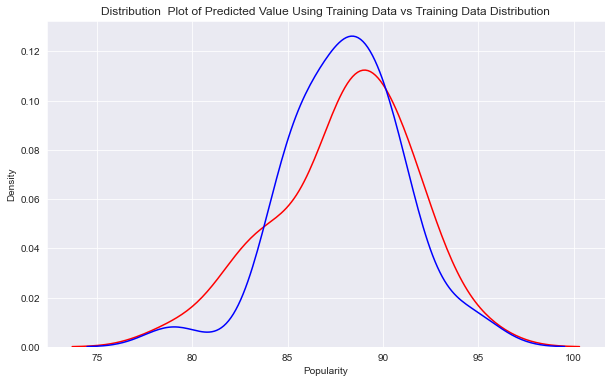

In [55]:
# View distribution of actual salaries compared to predicted salaries
Title = 'Distribution  Plot of Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

/Users/mohammedhussain/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/mohammedhussain/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


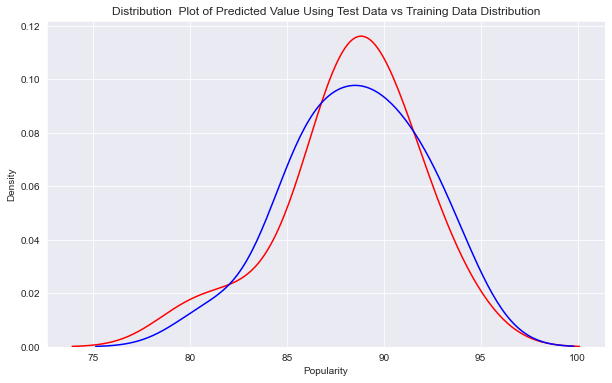

In [56]:
# View distribution of actual salaries compared to predicted salaries
Title = 'Distribution  Plot of Predicted Value Using Test Data vs Training Data Distribution'
DistributionPlot(y_test, y_pred_lr, "Actual Values (Test)", "Predicted Values (Test)", Title)

# Model 2 : Polynomial Transformation

In [57]:
from sklearn.preprocessing import PolynomialFeatures
# Fit and transform the variables using 2nd order polynomial
poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)
poly

PolynomialFeatures()

In [58]:
# Create new model using polynomial transformation
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

LinearRegression()

In [59]:
#make predictions and view first five predictions on train data - 
yhat_poly = poly_model.predict(X_train_poly)
print ('First 12 predictions(train data)', yhat_poly[0:12])

First 12 predictions(train data) [87. 91. 88. 82. 95. 90. 84. 89. 88. 79. 89. 89.]


In [60]:
#Compare first 12 predicted values vs actual values - 
print ('Predicted Values(train)', yhat_poly[0:12])
print ('Actual Values(train)', y_test[0:12].values)

Predicted Values(train) [87. 91. 88. 82. 95. 90. 84. 89. 88. 79. 89. 89.]
Actual Values(train) [91 87 89 88 89 80 88 91 94 83 87 86]


In [61]:
yhat_polyTest = poly_model.predict(X_test_poly)
yhat_polyTest[0:10]

array([ 89.18572939,  95.50005931,  93.92161357,  85.13834423,
        92.76592644,  94.66195572, 138.92109489,  87.02537472,
        96.70291376, 104.79831513])

In [62]:
print("Predicted Values:", yhat_polyTest[0:12])
print("True Values:", y_test[0:12].values)

Predicted Values: [ 89.18572939  95.50005931  93.92161357  85.13834423  92.76592644
  94.66195572 138.92109489  87.02537472  96.70291376 104.79831513
  92.67969126  77.60585871]
True Values: [91 87 89 88 89 80 88 91 94 83 87 86]


In [63]:
print("R-squared of training data:", poly_model.score(X_train_poly, y_train))
print("R-squared of test data:", poly_model.score(X_test_poly, y_test))

R-squared of training data: 1.0
R-squared of test data: -19.85620167431766


In [64]:
print("MSE of training data:", mean_squared_error(y_train, yhat_poly))
print("MSE of test data:", mean_squared_error(y_test, yhat_polyTest))

MSE of training data: 1.4075190939216115e-28
MSE of test data: 237.66800485755778


In [65]:
print("RMSE of training data:", math.sqrt(mean_squared_error(y_train, yhat_poly)))
print("RMSE of test data:", math.sqrt(mean_squared_error(y_test, yhat_polyTest)))

RMSE of training data: 1.1863890988717029e-14
RMSE of test data: 15.416484841154865


/Users/mohammedhussain/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/mohammedhussain/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


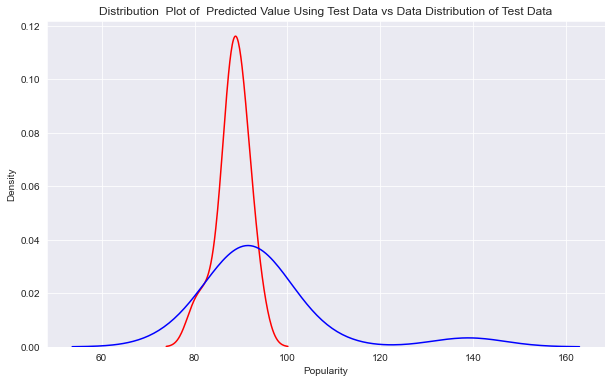

In [66]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_polyTest,"Actual Values (Test)","Predicted Values (Test)",Title)

The polynomial regression has failed to perform good predictions

# Model 3 : Ridge Model

Ridge Regression is a type of Linear Regression which is used to check the linear dependencies in the dataset. Ridge regression helps in mitigating overfitting. Hence, this model can be useful if structure of data consists linear dependencies.

Lets apply the ridge regression to lower the MSE and RMSE


In [67]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=1.0)

In [68]:
ridge_model.fit(X_train_poly, y_train)

Ridge()

In [69]:
yhat_ridge_train = ridge_model.predict(X_train_poly)
yhat_ridge_test = ridge_model.predict(X_test_poly)

In [70]:
print('Predicted:', yhat_ridge_train[0:12])
print('Actual :', y_train[0:12].values)

Predicted: [87.30924416 90.91191634 87.82262798 82.82119775 94.61143871 89.72751335
 85.81330201 88.66425074 87.95109535 80.29577293 88.88947286 89.1363841 ]
Actual : [87 91 88 82 95 90 84 89 88 79 89 89]


In [71]:
print('Predicted:', yhat_ridge_test[0:12])
print('Actual :', y_test[0:12].values)

Predicted: [87.80107687 87.82736759 90.04782093 88.0870589  91.35574788 85.93916565
 97.39475083 87.57530138 89.73158452 95.26463535 88.33585895 84.01527071]
Actual : [91 87 89 88 89 80 88 91 94 83 87 86]


In [72]:
print("R-squared of training data:", ridge_model.score(X_train_poly, y_train))
print("R-squared of test data:", ridge_model.score(X_test_poly, y_test))
# No significant improvement

R-squared of training data: 0.8411544299085061
R-squared of test data: -1.1197149085662055


In [73]:
print("MSE of training data:", mean_squared_error(y_train, yhat_ridge_train))
print("MSE of test data:", mean_squared_error(y_test, yhat_ridge_test))

MSE of training data: 1.9493224965130618
MSE of test data: 24.155329002505564


In [74]:
print("RMSE of training data:", math.sqrt(mean_squared_error(y_train, yhat_ridge_train)))
print("RMSE of test data:", math.sqrt(mean_squared_error(y_test, yhat_ridge_test)))

RMSE of training data: 1.396181398140321
RMSE of test data: 4.914807117528171


No significant improvement in R-square , RMSE or MSE

We will use gridsearch to ensure best hyperparameter was used:


In [75]:
gridSearch_params= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
gridSearch_params

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

In [76]:
ridge_object = Ridge()
ridge_object

Ridge()

Create ridge grid search object and fit:

In [77]:
from sklearn.model_selection import GridSearchCV
Grid1 = GridSearchCV(ridge_object, gridSearch_params, cv=5)

In [78]:
Grid1.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

In [79]:
best_ridge_model = Grid1.best_estimator_
best_ridge_model

Ridge(alpha=100000)

In [80]:
best_ridge_model.score(X_test, y_test)

-0.007715193999380476

Not a significant model either

# Random Forest Model

We use Random forest because it has the power to handle a large data set with higher dimensionality and is robust while working on large proportion of dataset, also controlling overfitting by using more number of trees.

In [81]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=250, n_jobs=4, max_depth=30, 
                           min_samples_split=60, max_features='auto', verbose=0)

In [82]:
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=30, min_samples_split=60, n_estimators=250,
                      n_jobs=4)

In [83]:
rf_predictions = rf.predict(X_test)
rf_predictions[0:12]

array([87.97563636, 87.97563636, 87.97563636, 87.97563636, 87.97563636,
       87.97563636, 87.97563636, 87.97563636, 87.97563636, 87.97563636,
       87.97563636, 87.97563636])

In [84]:
print("R-squared of test data:", rf.score(X_test, y_test))
print("MSE of test data:", mean_squared_error(y_test, rf_predictions))
print("RMSE of test data:", mean_squared_error(y_test, rf_predictions))

R-squared of test data: -0.0074326027255959826
MSE of test data: 11.480254192837469
RMSE of test data: 11.480254192837469


In [85]:
# Tuning the Random Forest Model

# Max features
max_features = ['auto', 'log2', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 15, num = 3)]

# Minimum number of samples required to split a node
min_samples_split = [2, 5,7,10,12,15,20]

# Minimum number of samples required at each leaf node
min_samples_leaf = [3,5, 8,10,12, 15, 20]

# Create the random grid
random_grid = {
               'max_features': max_features, 
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               }

print(random_grid)

{'max_features': ['auto', 'log2', 'sqrt'], 'max_depth': [5, 10, 15], 'min_samples_split': [2, 5, 7, 10, 12, 15, 20], 'min_samples_leaf': [3, 5, 8, 10, 12, 15, 20]}


In [86]:
from sklearn.model_selection import RandomizedSearchCV
# Random search to tune hyper parameters
rf_model = RandomForestRegressor(random_state=123,
                                n_jobs=-1)

rf_random = RandomizedSearchCV(estimator=rf_model, param_distributions=random_grid,
                              cv=3)

rf_random.fit(X_train, y_train)


RandomizedSearchCV(cv=3,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=123),
                   param_distributions={'max_depth': [5, 10, 15],
                                        'max_features': ['auto', 'log2',
                                                         'sqrt'],
                                        'min_samples_leaf': [3, 5, 8, 10, 12,
                                                             15, 20],
                                        'min_samples_split': [2, 5, 7, 10, 12,
                                                              15, 20]})

In [87]:
rf_random.best_params_

{'min_samples_split': 5,
 'min_samples_leaf': 8,
 'max_features': 'auto',
 'max_depth': 15}

In [88]:
# Best random forest predictions
rf_pred = rf_random.predict(X_test)

In [89]:
# Best random forest predictions

print("R-squared of test data:", rf_random.score(X_test, y_test))
print("MSE of test data:", mean_squared_error(y_test, rf_pred))
print("RMSE of test data:", math.sqrt(mean_squared_error(y_test, rf_pred)))

R-squared of test data: -0.15120366546678832
MSE of test data: 13.118605325585985
RMSE of test data: 3.621961530108511


/Users/mohammedhussain/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/mohammedhussain/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


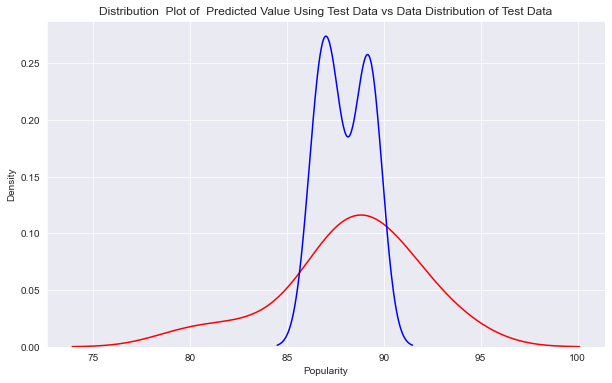

In [90]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,rf_pred,"Actual Values (Test)","Predicted Values (Test)",Title)

 Random forest lao turned out to be a non-significant model

# Gradient boosting Model 

Gradient Boosted Decision Trees (GBDT) builds a series of small decision trees where each tree attempts to correct errors from the previous stage. GBDT are often best models in many problems, so it's worth using them.

In [91]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [92]:
GB = GradientBoostingRegressor(n_estimators=250, max_depth=6, loss='ls',learning_rate=0.1,verbose=0)

In [93]:
GB.fit(X_train,y_train)

/Users/mohammedhussain/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


GradientBoostingRegressor(loss='ls', max_depth=6, n_estimators=250)

In [94]:
# Salary predictions 
gb_pred = GB.predict(X_test)
print("R-squared of test data:", GB.score(X_test, y_test))
print("MSE of test data:", mean_squared_error(y_test, gb_pred))
print("RMSE of test data:", math.sqrt(mean_squared_error(y_test, gb_pred)))

R-squared of test data: -0.5895376397511416
MSE of test data: 18.113664481430796
RMSE of test data: 4.256015094126288


/Users/mohammedhussain/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/mohammedhussain/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


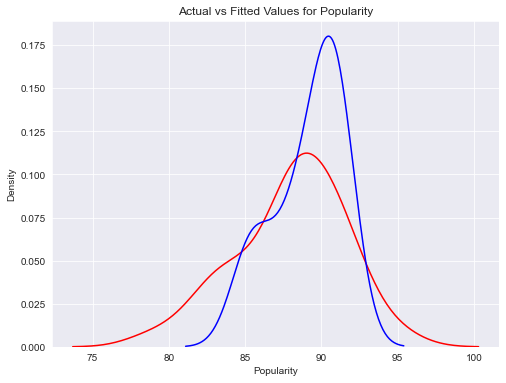

In [95]:
plt.figure(figsize=(8, 6))
ax1 = sns.distplot(y_train, hist=False, color="r", label="Actual Value")
sns.distplot(gb_pred, hist=False, color="b", label="Fitted Values", ax=ax1)

plt.title('Actual vs Fitted Values for Popularity')

plt.show()
plt.close()

Gradient boosting definitely performed better than Random forest

Linear regression was the only model that performed well on this dataset.

Most of the models failed to performf well on this dataset because the dataset has only 50 rows which is too less